<a href="https://colab.research.google.com/github/Abhishek-mahajan02/WEATHER-LENS-/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS Assignment


**Welcome to your EDA assignment ! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**

This assignment is expected to be completed in Jupyter notebooks or Google Colab and submitted as an ipynb file.


### 1) Start by importing all important libraries
For eg, "import numpy as np"

Import numpy, matplotlib, seaborn, pandas and any others that you require.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import plotly.express as px 
import tensorflow as tf 
from sklearn.decomposition  import PCA


### 2) Read the csv file and assign it to a variable . 

In [36]:
 ds = pd.read_csv('/content/pokemon_dataset.csv')
 ds.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 3) Display shape of dataframe
Expected Output - (800, 13)

In [4]:
ds.shape


(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [6]:
ds.columns


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 5) Remove the column '#' and update the dataframe.

In [8]:
X = ds.drop(columns = '#', axis=1)
print(X)

                      Name   Type 1  Type 2  ...  Speed  Generation  Legendary
0                Bulbasaur    Grass  Poison  ...     45           1      False
1                  Ivysaur    Grass  Poison  ...     60           1      False
2                 Venusaur    Grass  Poison  ...     80           1      False
3    VenusaurMega Venusaur    Grass  Poison  ...     80           1      False
4               Charmander     Fire     NaN  ...     65           1      False
..                     ...      ...     ...  ...    ...         ...        ...
795                Diancie     Rock   Fairy  ...     50           6       True
796    DiancieMega Diancie     Rock   Fairy  ...    110           6       True
797    HoopaHoopa Confined  Psychic   Ghost  ...     70           6       True
798     HoopaHoopa Unbound  Psychic    Dark  ...     80           6       True
799              Volcanion     Fire   Water  ...     70           6       True

[800 rows x 12 columns]


###  7) Print a list of all the unique Type-1 powers

In [12]:
ds['Type 1'].unique()


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

### 1. How many pokemons have 'Mega' in their name?

### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [13]:
ds.std( )


#             208.343798
Total         119.963040
HP             25.534669
Attack         32.457366
Defense        31.183501
Sp. Atk        32.722294
Sp. Def        27.828916
Speed          29.060474
Generation      1.661290
Legendary       0.273390
dtype: float64

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ? 

In [ ]:
#your code here


**Now that you have imported the dataset and libraries, and answered some basic questions, you can move on to the visualizations and some intermediate statistics !**

### Discrete variables:
a. For each variable, plot the frequency of each unique value (histogram).

b. For each variable, identify the mode value.

### Continuous variables:

(Define a function for parts 'a' and 'b' which will accept feature name as input and print/plot required quantities as output. This will save time)

a. For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range.

b. For each variable, plot box-and-whiskers plots.

c. For each variable, plot the histogram. (do this manually for each feature and adjust the number of bins)

d. For any 2 continuous variables, plot the QQ plot. Read online about how it is interpreted.



### Pairwise interactions

a. Pick any two discrete-continuous pairs, and plot box-and-whiskers plot for the continuous variable side-by-side for each value of the discrete variable.

b. Plot a heatmap of correlation between all pairs of continuous variables. Use seaborn for this.

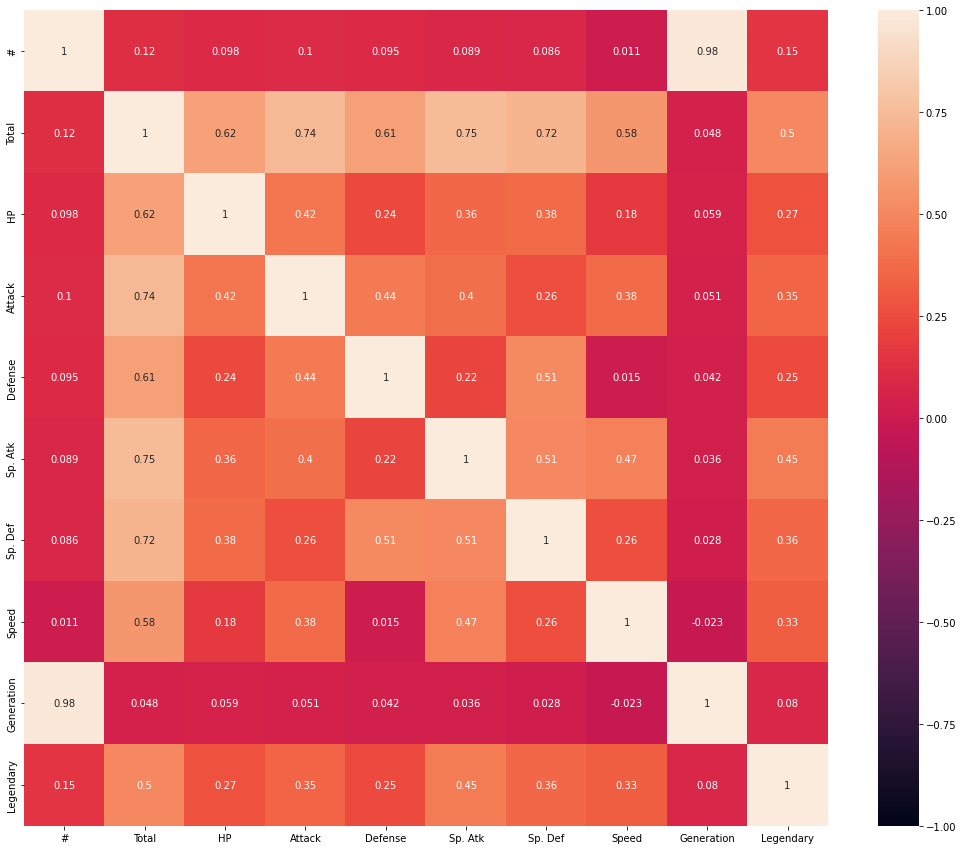

In [28]:
Y=ds.drop('Type 1' , axis =1).columns
cm=ds[Y].corr()
plt.figure(figsize=(18,15))
sns.heatmap(cm,annot=True , vmin = -1.0 , vmax=1.0)
plt.show()

In [31]:
ds.mode()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,479.0,Abomasnow,Water,Flying,600.0,60.0,100.0,70.0,60.0,80.0,50.0,1.0,False
1,NaN,AbomasnowMega Abomasnow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Abra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Absol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,AbsolMega Absol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,Zoroark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,NaN,Zorua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,Zubat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,NaN,Zweilous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: ignored

In [30]:
ds.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000
